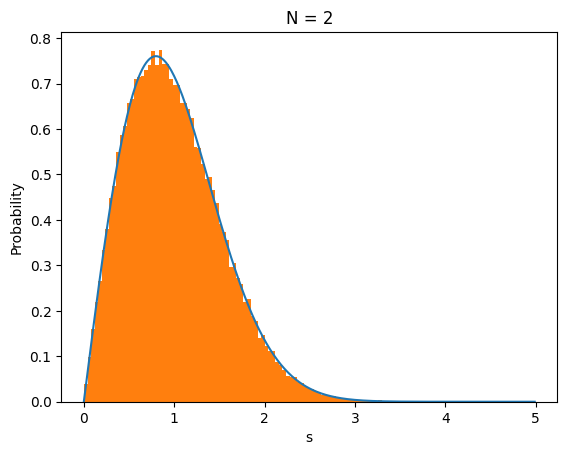

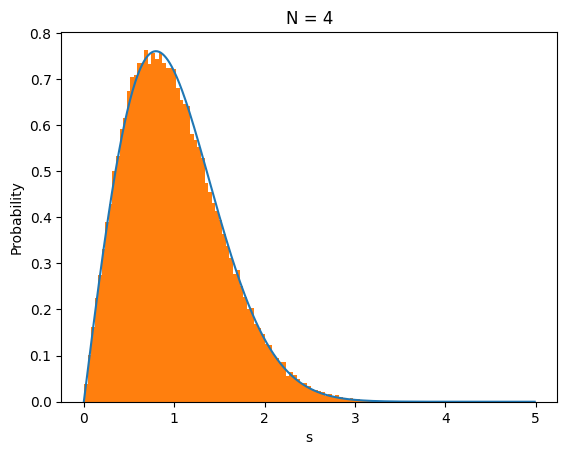

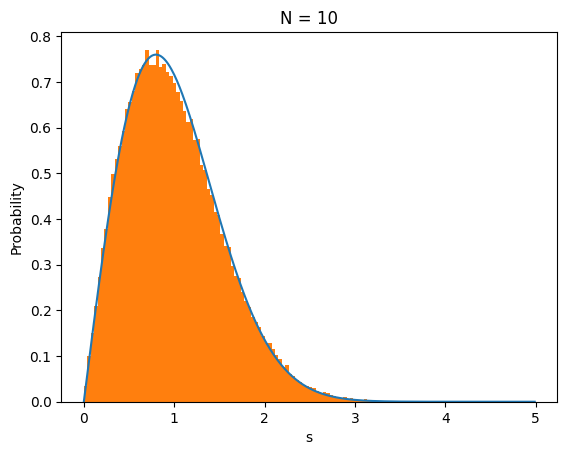

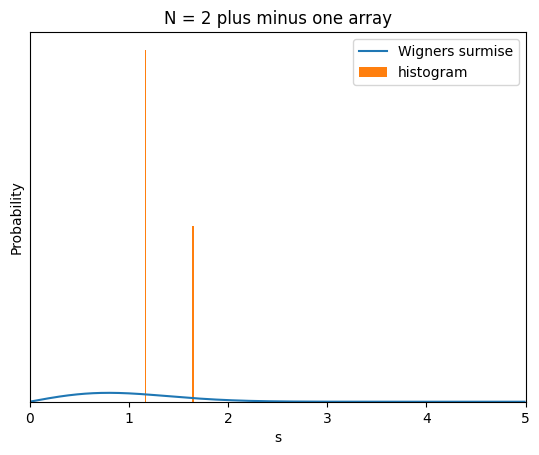

/tmp/ipykernel_80331/2941087979.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  importanteigenvaluelist[num] = eigvalues[novertwoindex]-eigvalues[novertwoindex-1] # calculates splitting


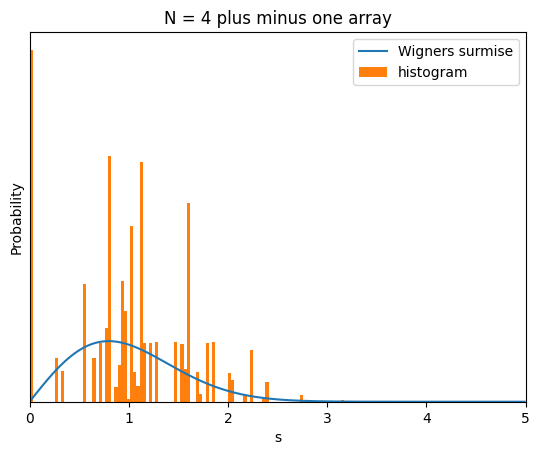

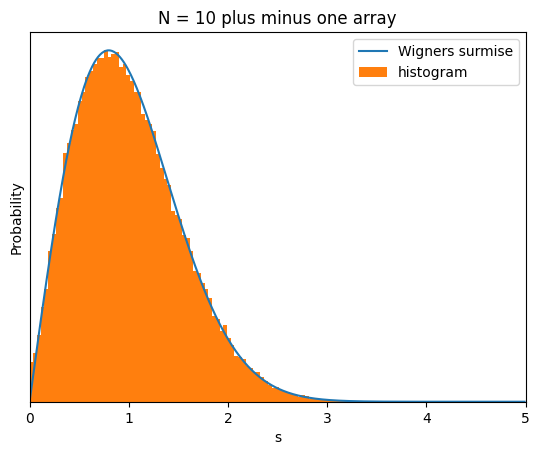

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt


numensembles=100000 # This is M
sigma=1 # this is sigma
n=2 # ignore this, dont need to change this urself
num_hist_bins=100 # histogram binning specification

#PART A
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def randomnumber(sigma):
    num = np.random.normal(loc=0, scale=sigma)
    return num

def genarraygaussian(size, stdev):
    array = np.zeros((size, size), dtype='float64')
    for i in range(size):
        for j in range(size):
            array[i,j] = randomnumber(stdev)
    return array

def genensemblesgaussian(M, stdev, size):
    arr = np.zeros((M), dtype=object)
    importanteigenvaluelist =np.zeros((M))

    for num in range(M):
        array = genarraygaussian(size, stdev)
        
        arr[num] = array + array.T # makes it symmetric
        novertwoindex = int(np.floor(size/2)) # this is N/2
        
        eigvalues, eigvectors = np.linalg.eig(arr[num]) # gets the eigvalues and eigvectors
        idx = eigvalues.argsort()[::1]  # sorts the eigenvectors
        eigvalues = eigvalues[idx] # same
        
        importanteigenvaluelist[num] = eigvalues[novertwoindex]-eigvalues[novertwoindex-1] # calculates splitting
    return importanteigenvaluelist

# UN COMMENT NEXT SIX LINES TO RUN PART A  :)

#for N in [2,4,10]:
#    splittinglist = genensemblesgaussian(numensembles, sigma, N)
#    a=plt.hist(splittinglist / np.mean(splittinglist), bins=num_hist_bins, density=True)
#    plt.title(f'Part A, N={n}')
#    plt.show()
#    plt.close()

# END PART A
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# PART E
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def comparewithwigner(numdimensions):
    s = np.arange(0, 5, .01)
    plt.plot(s, (np.pi * s / 2 * np.exp(-1 * np.pi * s**2 / 4)))
    
    splittinglist = genensemblesgaussian(numensembles, sigma, numdimensions)
    plcholder=plt.hist(splittinglist / np.mean(splittinglist), bins=num_hist_bins, density=True)

    plt.title(f'N = {numdimensions}') 
    plt.xlabel('s')
    plt.ylabel('Probability')
    plt.show()
    plt.close()

# UN COMMENT NEXT TWO LINES TO RUN PART E
for i in [2, 4, 10]:
    comparewithwigner(i)

# END PART E
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# PART F
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def genarrayplusminusone(size):
    array = np.zeros((size, size), dtype=int)
    for i in range(size):
        for j in range(size):
            randomseed = np.random.rand()
            if randomseed>0.5:
                array[i,j] = 1
            if randomseed<=0.5:
                array[i,j] = -1
    return array

def genensemblespm(M, size):
    arr = np.zeros((M), dtype=object)
    importanteigenvaluelist =np.zeros((M))

    for num in range(M):
        array = genarrayplusminusone(size)
        
        arr[num] = array + array.T # makes it symmetric
        novertwoindex = int(np.floor(size/2)) # this is N/2
        
        eigvalues, eigvectors = np.linalg.eig(arr[num]) # gets the eigvalues and eigvectors
        idx = eigvalues.argsort()[::1]  # sorts the eigenvectors
        eigvalues = eigvalues[idx] # same
        
        importanteigenvaluelist[num] = eigvalues[novertwoindex]-eigvalues[novertwoindex-1] # calculates splitting
    return importanteigenvaluelist

def comparepmwithwigner(numdimensions):
    s = np.arange(0, 5, .01)
    plt.plot(s, (np.pi * s / 2 * np.exp(-1 * np.pi * s**2 / 4)), label='Wigners surmise')
    
    splittinglist = genensemblespm(numensembles, numdimensions)
    plcholder=plt.hist(splittinglist / np.mean(splittinglist), bins=num_hist_bins, density=True, label='histogram')
    
    plt.xlim(0,5)
    plt.title(f'N = {numdimensions} plus minus one array') 
    plt.xlabel('s')
    plt.ylabel('Probability')
    plt.yticks([])
    plt.legend()

    plt.show()
    plt.close()

def comparegaussian(N):
    splittinglist = genensemblespm(numensembles, N)
    a=plt.hist(splittinglist / np.mean(splittinglist), bins=num_hist_bins, density=True)
    s = np.arange(0, 5, .01)
    plt.plot(s, (np.pi * s / 2 * np.exp(-1 * np.pi * s**2 / 4)))
    plt.title(f'N= {N} plus minus one arrays')
    plt.ylabel('Probability')
    plt.yticks([])
    plt.xlabel('Splitting')
    plt.xlim(0,5)
    plt.show()
    plt.close()
    
    splittinglist = genensemblesgaussian(numensembles, sigma, N)
    a=plt.hist(splittinglist / np.mean(splittinglist), bins=num_hist_bins, density=True)
    s = np.arange(0, 5, .01)
    plt.plot(s, (np.pi * s / 2 * np.exp(-1 * np.pi * s**2 / 4)))
    plt.title(f'N= {N} gaussian arrays')
    plt.ylabel('Probability')
    plt.xlabel('Splitting')
    plt.show()
    plt.close()

#comparegaussian(10)

# Uncomment below to check part F!!
for i in [2, 4, 10]:
    comparepmwithwigner(i)


In [15]:
print(a)

(array([4.25410981e-02, 1.08884954e-01, 1.54464702e-01, 2.40559781e-01,
       3.01332778e-01, 3.38809460e-01, 4.11230615e-01, 4.30981839e-01,
       4.98338578e-01, 5.79369241e-01, 6.08742857e-01, 6.05704207e-01,
       6.58880579e-01, 6.75593154e-01, 7.22692227e-01, 7.35353268e-01,
       7.63714000e-01, 7.61181792e-01, 7.42443451e-01, 7.38898359e-01,
       7.50040075e-01, 7.64220442e-01, 7.00408794e-01, 7.60168908e-01,
       7.01421678e-01, 7.11550510e-01, 6.62425671e-01, 6.26974756e-01,
       6.51283955e-01, 6.26468314e-01, 5.52021392e-01, 5.55060042e-01,
       5.47969859e-01, 5.18089802e-01, 4.54784597e-01, 4.65926313e-01,
       4.45162205e-01, 4.13256382e-01, 3.45393202e-01, 3.29187069e-01,
       2.90697504e-01, 3.17032469e-01, 2.94749037e-01, 2.79555788e-01,
       2.54740147e-01, 2.23847207e-01, 1.98018683e-01, 1.72696601e-01,
       1.60542001e-01, 1.50413168e-01, 1.51426052e-01, 1.27623294e-01,
       1.15468695e-01, 9.57174708e-02, 8.55886379e-02, 8.45757546e-02,
     

In [22]:
print(importanteigenvaluelist)

7.067479231711895j


In [95]:
a = genensembles(10, 1, 4)

[-5.52915417 -2.02657513  1.89427071  4.17099746]
[-1.80531118 -1.53778037  1.11309298  3.25874893]
[-5.66646399 -3.00384813  0.59274282  2.37532798]
[-5.45938736 -0.58245272  0.22750035  5.09469467]
[-3.36889039 -0.37074898  0.19306016  6.85757419]
[-3.98321758  1.0485289   3.71576368  4.96135399]
[-5.66175447 -2.42025744 -1.9947228   2.09060766]
[-3.86547298 -1.64645711  0.82109149  4.88985497]
[-2.48670142  0.66299691  2.29794008  8.08168061]
[-2.15725746  0.3173637   0.68945239  3.19433265]


In [117]:
genarrayplusminusone(4)

array([[ 1, -1,  1, -1],
       [-1, -1, -1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1,  1,  1]])